## 데이터 확인
분석에 사용할 데이터 고객 254명의 상품 구매 관련

In [22]:
import pandas as pd

# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

# 고객 번호(customer_id), 총 구매 수량(total_buy_cnt), 총 구매 금액(total_price)
sales_df = pd.read_csv('data/sales_data.csv', index_col=['customer_id'])
sales_df

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750
...,...,...
18144,30,90750
18168,243,1533530
18225,1,91430


## 이상치 제거

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

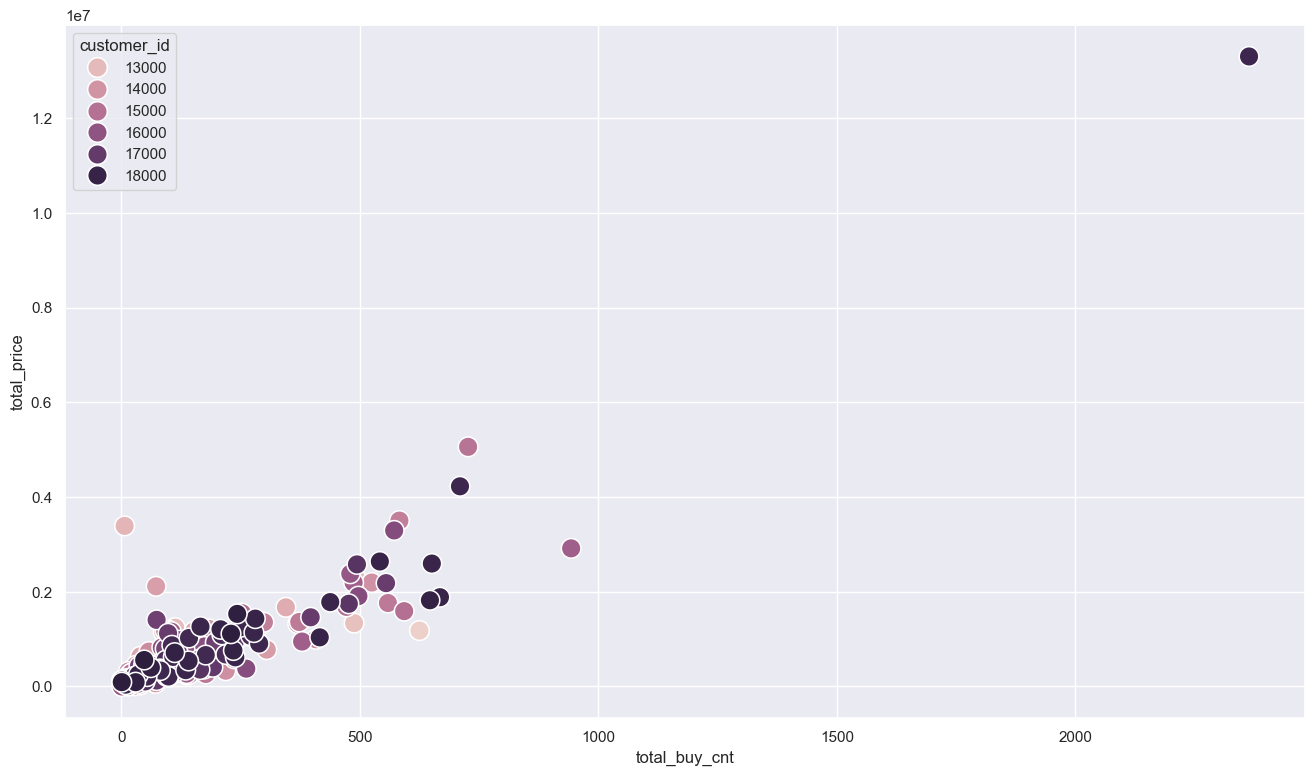

In [23]:
import seaborn as sns

sns.set(style = "darkgrid", rc={"figure.figsize": (16,9)})

sns.scatterplot(x="total_buy_cnt", y="total_price", data=sales_df, hue="customer_id", s=200)

In [54]:
# 함수로 이상치제거
def get_outliers_mask(df):

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR = Q3 - Q1
    
    range_min = Q1 - IQR * 1.5
    range_max = Q3 + IQR * 1.5
    
    
    outlier_per_column =  (df < range_min) | (df > range_max)
    is_outlier = outlier_per_column.any(axis=1)
    
    return is_outlier

any(axis=1): 각 행에 대해 하나라도 True 값이 있으면 True를 반환

axis=1을 사용하는 이유는 데이터프레임의 각 행(row)을 따라 연산을 수행하기 위해서입니다
만약 아무것도 안쓰면 기본값 axis=0 

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

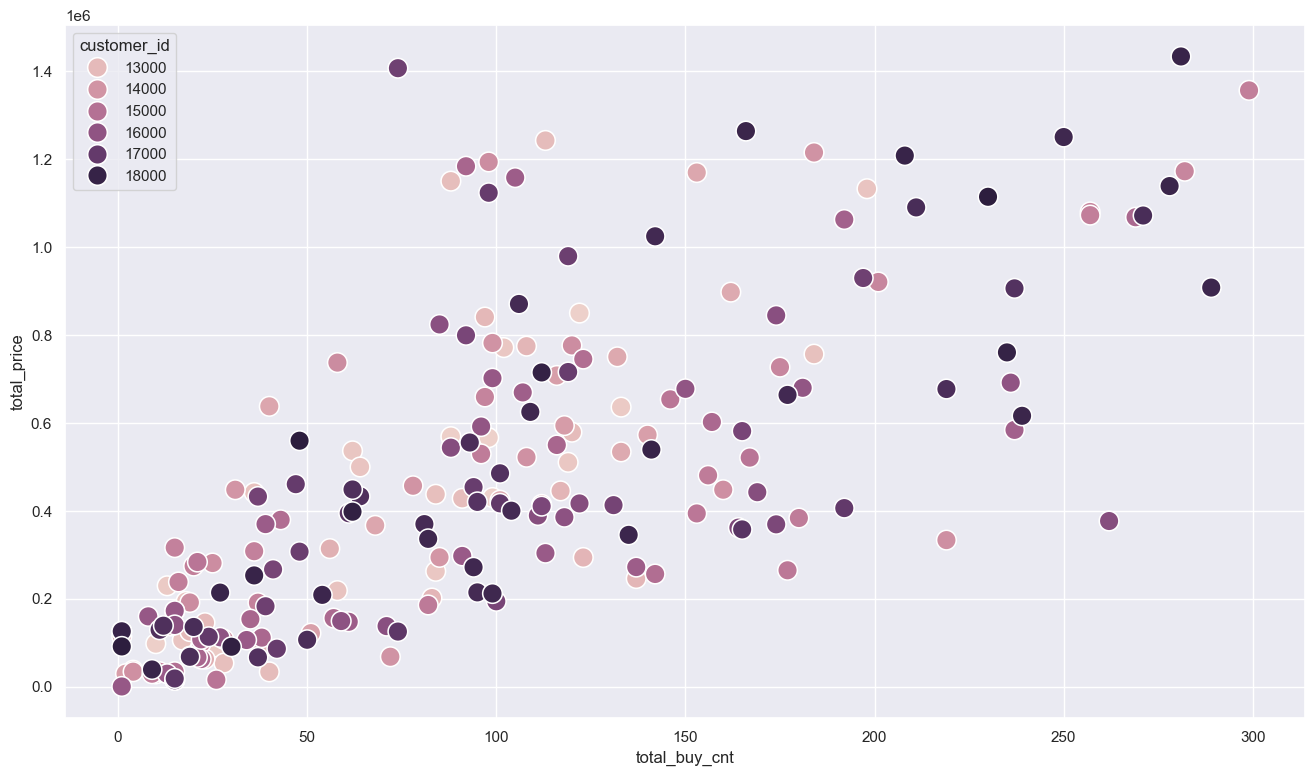

In [55]:
outlier_idx_cust_df = outliers_mask = get_outliers_mask(sales_df)

sales_df = sales_df[~outlier_idx_cust_df]

sns.scatterplot(x="total_buy_cnt", y="total_price", data=sales_df, hue="customer_id", s=200)

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

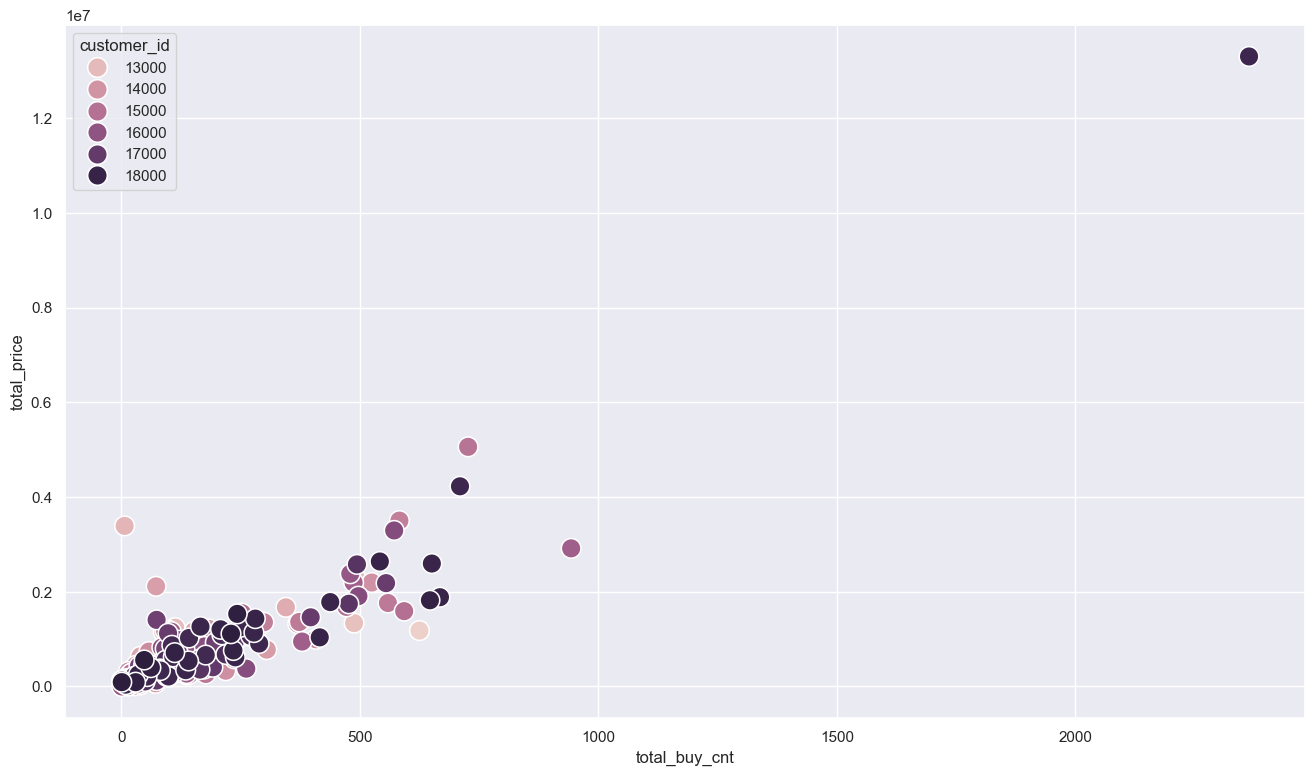

In [26]:
# drop 방법
import pandas as pd

# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('data/sales_data.csv', index_col=['customer_id'])

sns.scatterplot(x="total_buy_cnt", y="total_price", data=sales_df, hue="customer_id", s=200)

In [27]:
Q1 = sales_df.quantile(0.25)
Q3 = sales_df.quantile(0.75)

IQR = Q3 - Q1

outlier = ((sales_df < Q1 - (IQR * 1.5)) | (sales_df > Q3 + (IQR * 1.5))).any(axis=1)

In [28]:
sales_df[outlier]

,total_buy_cnt,total_price
customer_id,,
12433,625,1180950
12838,488,1339170
13013,491,2303640
13145,7,3392500
13705,73,2115930
14083,525,2195970
14449,408,998320
14573,583,3504400
14729,559,1763250


In [29]:
sales_df = sales_df.drop(sales_df[outlier].index)

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

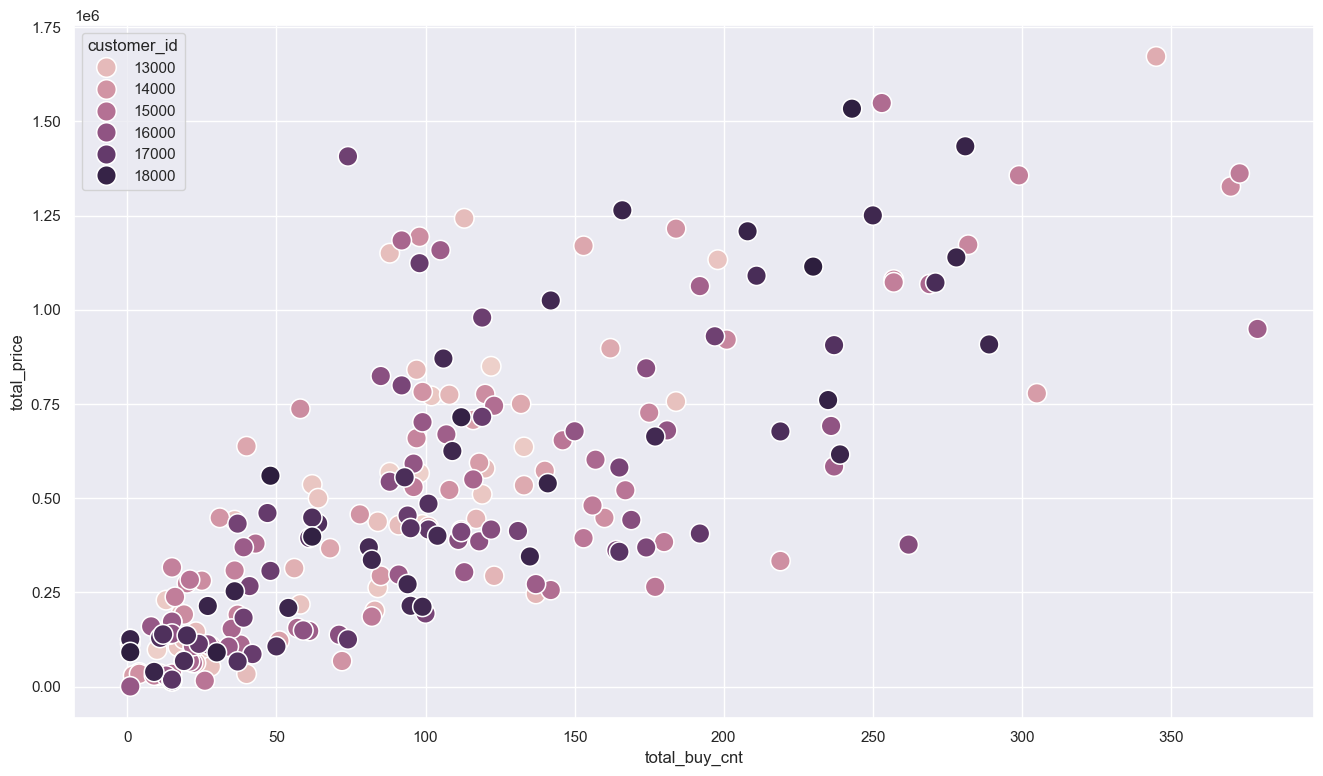

In [30]:
sns.scatterplot(x="total_buy_cnt", y="total_price", data=sales_df, hue="customer_id", s=200)

## 데이터 표준화(Standardization)

Z = X - m / 표준편차

In [31]:
from sklearn.preprocessing import StandardScaler

# StandardScaler를 사용하여 데이터를 스케일링
scaler = StandardScaler()
scaled_df = scaler.fit_transform(sales_df)
scaled_df

array([[-0.05320755, -0.15182767],
       [-0.06534923,  0.20642674],
       [ 0.22605112,  0.95232527],
       [-1.13381718, -1.0266778 ],
       [-0.18676604,  0.21255727],
       [-0.93955028, -1.0462797 ],
       [ 0.35960962,  0.38931646],
       [-1.09739214, -0.68021084],
       [ 0.18962608,  0.05884676],
       [-0.0167825 ,  0.74570277],
       [-0.23533277, -0.59364672],
       [-0.50244975,  0.12744027],
       [ 1.1488189 ,  1.6968293 ],
       [-0.47816639,  0.0309568 ],
       [-1.04882541, -1.0054709 ],
       [-0.55101648, -0.70917956],
       [-1.03668373, -0.77401056],
       [-0.81813347, -0.12188543],
       [ 0.97883536,  0.70647265],
       [-0.91526692, -1.14313153],
       [-0.23533277, -0.13240995],
       [-0.18676604,  1.7420584 ],
       [-0.150341  , -0.15664264],
       [ 0.20176776,  0.23918429],
       [ 0.11677599,  1.98570087],
       [-0.76956674, -1.19546467],
       [-0.97597532, -0.90106774],
       [-1.02454205, -0.95403235],
       [-0.07749091,

In [32]:
# 스케일링된 데이터를 데이터프레임으로 변환하고, 인덱스와 컬럼명 설정
scaled_df = pd.DataFrame(scaled_df, index=sales_df.index, columns=sales_df.columns)
scaled_df

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.03
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.05
18168,1.70,2.75
18225,-1.24,-1.04


In [33]:
# df_mean = sales_df.mean()
# df_std = sales_df.std()
# 
# scaled_df = (sales_df - df_mean) / df_std

In [34]:
scaled_df

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.03
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.05
18168,1.70,2.75
18225,-1.24,-1.04


In [35]:
scaled_df.columns = ['total_buy_cnt', 'total_price']

# 인덱스 설정
scaled_df.index = sales_df.index 

scaled_df

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.03
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.05
18168,1.70,2.75
18225,-1.24,-1.04


질문 1
클러스터 분석에 대한 설명 중 옳지 않은 것을 고르세요.

1. 클러스터링은 주어진 데이터들의 특성을 고려해 유사한 데이터끼리 묶어 주는 분석 방법이다.
2. 클러스터링을 통해 고객을 구매 특성에 따라 나눠 볼 수 있다.
3. 클러스터링의 원리 중 하나는 ‘클러스터 내 데이터들 간의 거리 최대화’이다.
4. 클러스터링의 원리 중 하나는 ‘서로 다른 클러스터 사이의 거리 최대화’이다.
5. 클러스터링을 하면 주어진 데이터를 이해하기 쉽게 나눌 수 있다.

퀴즈 해설

정답: 3번

클러스터링의 원리 중 하나는 클러스터 내 데이터들 간의 거리 최대화가 아니라 최소화입니다.

질문 2
클러스터링 전처리에 관한 설명 중 옳지 않은 것을 고르세요.

1. StandardScaler로 스케일링을 진행하면 평균이 0, 분산이 1인 데이터로 변경된다.
2. 이상치는 클러스터링 결과에 영향을 준다.
3. 클러스터링 전에 이상치를 확인해 제거가 필요한지 확인해야 한다.
4. 데이터의 변수들끼리 범위 차이는 크면 클수록 좋다.
5. 클러스터링을 진행했을 때 주어진 데이터를 이해하기 쉽게 나눌 수 있다.

퀴즈 해설

정답: 4번

변수들 사이의 범위 차이가 커지면 분석 결과가 잘못될 가능성이 높아집니다.

## 모델과 학습

모델이란?
1. 구체적인 분석 방법론,
2. 분석법을 적용하고 그 결과물을 저장할 수 있는 프로그램

학습이란?
넓은 의미에서는 모델에게 데이터를 전달해서 분석 시키는 과정

## k-means 동작 방식
k-means의 기본 아이디어는 다음과 같습니다.

유사한 데이터는 Centroid(중심점)로부터 가까이에 모여있다.


## 1단계: Centroid 배치
먼저, 클러스터의 개수를 의미하는 k를 정해 줘야 합니다. 예시에서는 2로 설정할게요. 그리고, k의 값만큼 Centroid를 생성하여 임의로 배치합니다.

## 2단계: 클러스터 형성
생성한 Centroid와 각 데이터 사이의 거리를 계산하여 가까이에 있는 데이터들을 하나의 클러스터로 묶어줍니다.

## 3단계: Centroid 위치 갱신
클러스터에 속해있는 데이터들의 중심으로 Centroid의 위치를 이동합니다. 이때, 데이터들 사이의 중심을 찾기 위하여 평균값(means)을 사용합니다.

## 4단계: 클러스터 재형성
새롭게 위치한 Centroid를 기준으로 각 데이터와의 거리를 다시 계산하여 가까운 데이터들을 하나의 클러스터로 묶습니다.

## 5단계: Centroid 위치 갱신
새롭게 형성된 클러스터의 중심으로 Centroid를 다시 이동시킵니다.

## k-means 모델 학습
k-means를 할 때에는 scikit-learn이라는 라이브러리가 사용

In [36]:
from sklearn.cluster import KMeans

### 1. 모델 선언

In [37]:
# k-means(k=2)
model = KMeans(n_clusters=2, random_state=123)

- n_clusters는 클러스터를 몇 개로 나눌지, 즉 k를 몇으로 할지 결정해 주는 파라미터
- random_state는 여러 번 반복해서 모델을 학습시킬 때 동일한 결과가 나올 수 있도록 해 주는 난수
random_state를 123으로 지정하면 노트에서 나오는 실습과 동일한 결과를 확인 가능

### 2. 모델 학습

In [38]:
# model 학습
model.fit(scaled_df)

KMeans(n_clusters=2, random_state=123)

## 클러스터 시각화

predict() : 각 데이터가 어떤 클러스터로 구분됐는지 표시

### 3. 결과

해당 값을 scaled_df에 새로운 열(label)로 추가

In [39]:
# label 컬럼 생성
scaled_df['label'] = model.predict(scaled_df)

scaled_df

,total_buy_cnt,total_price,label
customer_id,,,
12395,-0.05,-0.15,0
12427,-0.07,0.21,0
12431,0.23,0.95,1
12471,-1.13,-1.03,0
12472,-0.19,0.21,0
...,...,...,...
18144,-0.89,-1.05,0
18168,1.70,2.75,1
18225,-1.24,-1.04,0


라벨링 된 데이터를 기준으로 클러스터를 구분해 시각화 해보고, 거기에 Centroid도 함께 표시

model.cluster_centers_: 클러스터링 모델의 각 클러스터 중심(centroid) 좌표를 저장하고 있는 속성입니다.

x=centers[:, 0]: 클러스터 중심의 첫 번째 좌표를 x축에 사용합니다.
y=centers[:,1]: 클러스터 중심의 두 번째 좌표를 y축에 사용합니다.
color='black': 클러스터 중심점을 검은색으로 표시합니다.
alpha=0.8: 점의 투명도를 0.8로 설정하여 약간 투명하게 만듭니다.
s=400: 클러스터 중심점의 크기를 400으로 설정하여 크게 표시합니다.

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

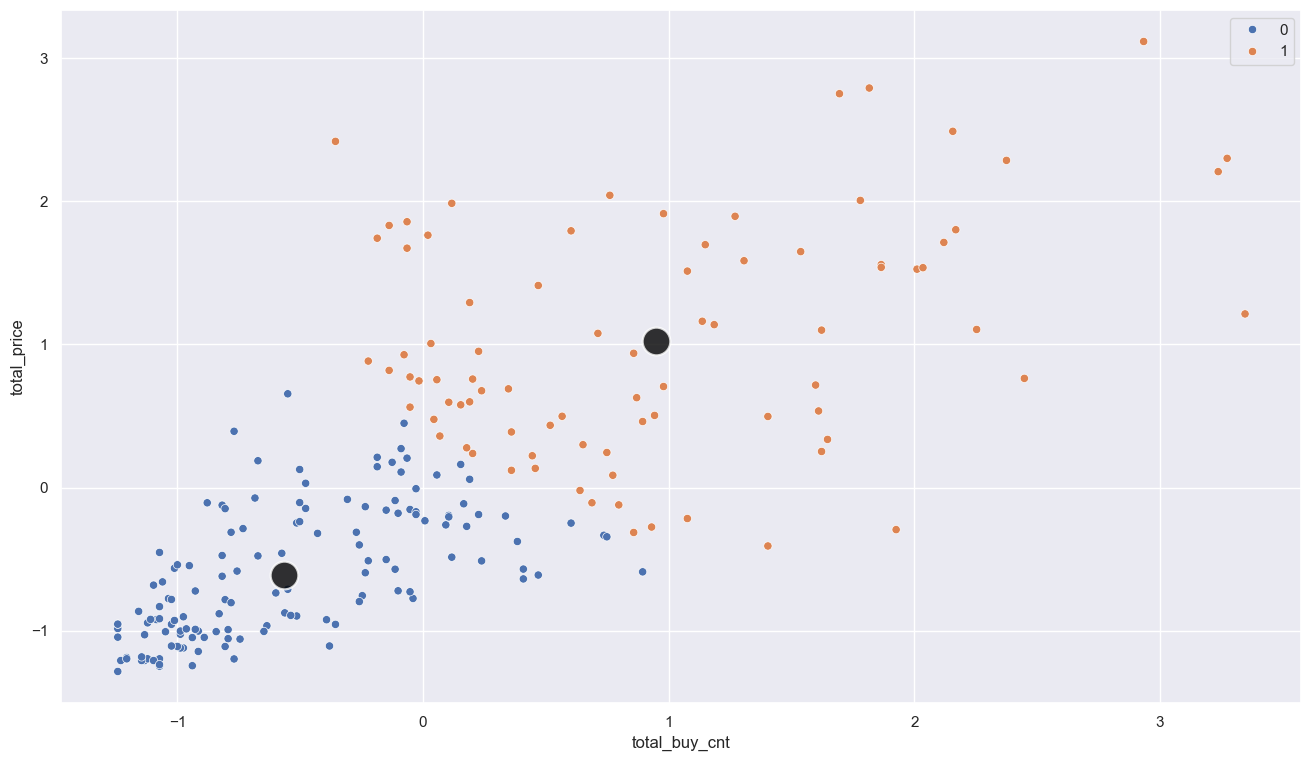

In [40]:
# 각 군집의 중심점
centers = model.cluster_centers_

# x,y 산점도 생성
sns.scatterplot(x="total_buy_cnt", y="total_price", data=scaled_df, hue="label")
# 중심점 생성
sns.scatterplot(x=centers[:, 0], y=centers[:,1], color='black', alpha=0.8, s=400)

In [41]:
#[[-0.56465473 -0.60996397] 라벨 0의 중심
#[ 0.9478133   1.02386809]] 라벨 1의 중심
print(centers)

[[-0.56591372 -0.61132398]
 [ 0.9499266   1.02615097]]


## k 선정이 중요한 이유
k-means의 성능은 클러스터의 개수(k)에 따라 달라집니다.

## 최적의 k 선정 기준
k-means는 k 개의 Centroid에 가까이 모여 있는 데이터들을 하나의 클러스터로 묶어 주는 방법
클러스터마다 속한 데이터와 Centroid 사이 거리의 합이 작아야 잘 된 클러스터링

그걸 확인하기 위해 사용하는 값이 inertia(이너시아)
inertia는 각 클러스터에 속한 데이터들과 Centroid 사이의 거리를 제곱해서 전부 더한 값

In [42]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

scaled_df = pd.read_csv('data/scaled_data.csv', index_col=[0])

In [43]:
# 1. 모델 생성
model = KMeans(n_clusters=2, random_state=123)

# 2. 모델 학습
# model에 scaled_df를 학습시키는 코드를 작성하세요
model.fit(scaled_df)

# 3. 결과
scaled_df['label'] = model.predict(scaled_df)

scaled_df['label'].value_counts()

label
0    141
1     84
Name: count, dtype: int64

In [44]:
# inertia 값 확인
print(model.inertia_)

187.06526917589144


## Elbow Method
k를 하나로만 정의해서 inertia를 구하면 해당 값이 큰 것인지 작은 것인지 판단하기가 어렵기때문에 
서로 다른 k 값 여러 개로 모델을 만든 다음에 각각의 inertia 값을 비교해 봐야한다.

In [45]:
# scaled_df에 추가했던 label 열을 제거
scaled_df = scaled_df.drop(['label'], axis=1)

다음으로 k의 개수를 1부터 15까지로 다르게 하여 각각의 inertia 값을 계산하고, 해당 값들을 시각화

inertias.append(model.inertia_) :
클러스터링 모델의 inertia 값을 계산하여 inertias 리스트에 추가합니다. 
inertia 값은 클러스터 내 데이터 포인트들이 클러스터 중심과 얼마나 가깝게 모여 있는지를 나타냅니다.

seaborn 라이브러리를 사용하여 k값에 따른 inertia 값을 선 그래프로 시각화합니다.
x=range(1, 16): x축에 1부터 15까지의 k값을 지정합니다.
y=inertias: y축에 inertias 리스트의 값을 지정합니다.
marker='o': 데이터 포인트를 원형 마커로 표시합니다.

<Axes: >

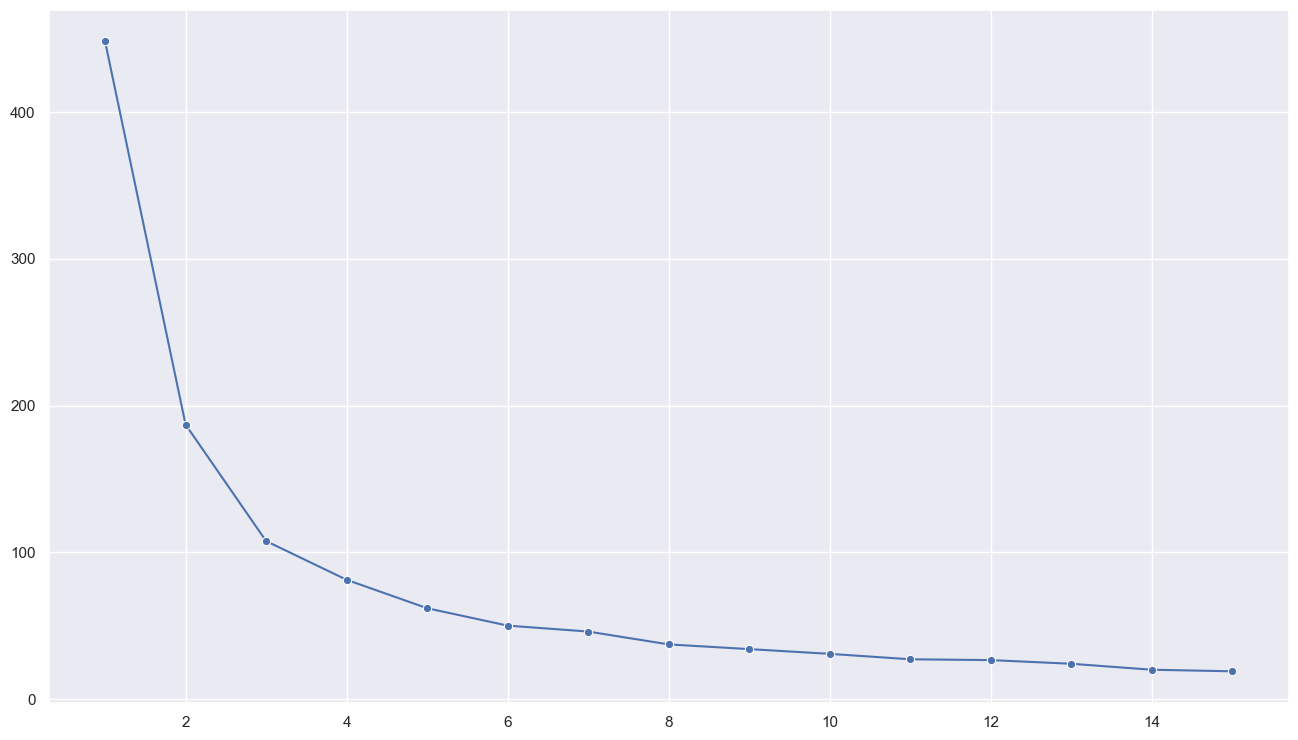

In [46]:
# inertia 값 저장할 리스트
inertias = []

# k값 범위 1~15로 지정
for k in range(1, 16):
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)
    
# k 값에 따른 inertia값 시각화
sns.lineplot(x=range(1,16), y=inertias, marker='o')

In [47]:
model = KMeans(n_clusters=5, random_state=123)
model.fit(scaled_df)

KMeans(n_clusters=5, random_state=123)

In [48]:
sales_df['label'] = model.predict(scaled_df)

## 클러스터링 결과 해석

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

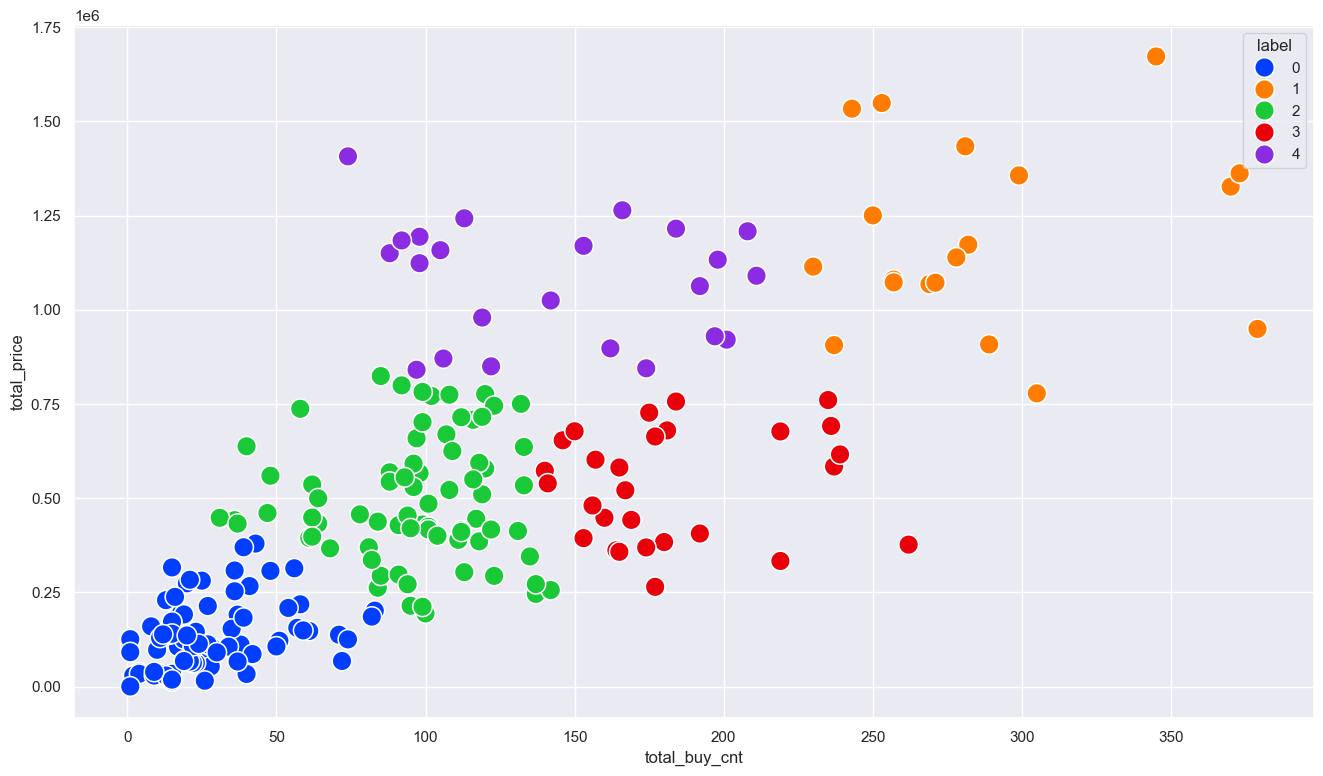

In [49]:
sns.scatterplot(x= sales_df['total_buy_cnt'], y= sales_df['total_price'], hue= sales_df['label'], s=200, palette='bright')

In [50]:
# 각 클러스터에 속해있는 고객 수 확인
pd.DataFrame(sales_df['label'].value_counts())

,count
label,
0,81
2,74
3,28
4,23
1,19


groupby()를 통해 각 클러스터별 구매 행동 특징 

In [51]:
# mean() 함수로 클러스터별 총 구매 금액과 총 구매 수량의 평균값을 확인
groupby_df = sales_df.groupby('label').mean()

총 구매 금액(total_price)을 총 구매 수량(total_buy_cnt)으로 나눈 평균 개당 가격(price_mean) 컬럼도 추가

In [52]:
groupby_df['price_mean'] = groupby_df['total_price'] / groupby_df['total_buy_cnt']
groupby_df

,total_buy_cnt,total_price,price_mean
label,,,
0,27.63,"134,258.02","4,859.20"
1,287.79,"1,197,027.89","4,159.39"
2,96.42,"493,092.97","5,114.07"
3,182.86,"532,944.29","2,914.54"
4,143.48,"1,076,521.30","7,503.03"


클러스트1 고객들은 총 구매수량과 금액이 가장 많다. 하지만 개당 구매가격은 적은편. 
해당 클러스트 고객들은 낮은 가격의 제품들을 많이 구매한다는 특징

클러스트4 고객들은 총 구매수량은 많은 편이 아니지만, 구매한 품목의 평균 금액은 높은편


## k-means의 장점
1. k-means는 변수들에 대한 배경지식, 역할, 영향도에 대해 모르더라도 데이터 사이의 거리만 구할 수 있다면 쉽게 사용할 수 있습니다.
2. 알고리즘이 비교적 쉬운 수식으로 이루어졌기 때문에 이해와 해석이 용이합니다.

이렇게 어떠한 데이터에도 적용하기 쉽고, 모델에 대한 이해와 해석도 간단하게 할 수 있다는 점이 k-means의 장점


## k-means의 단점

1. 최적의 클러스터 개수인 k를 정하는 게 어렵습니다. 앞에서 배운 Elbow Method로 단서를 얻는 것은 가능하지만, 합리적인 추론을 위한 가이드일 뿐 정답은 아닙니다.
2. k-means는 이상치에 영향을 많이 받습니다. 이상치가 포함된 데이터일 경우 클러스터의 중심(Centorid)을 업데이트하는 과정에서 Centroid의 위치가 크게 변동되고, 클러스터가 원하지 않는 방식으로 묶일 수 있습니다.

In [53]:
# k-means++는 Centroid가 좀 더 좋은 위치에 잘 배치되도록 해 줍니다. 때문에 일반 k-means보다 안정적
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, init='k-means++')

## 차원의 저주
변수가 더 많아질수록 모델의 성능은 오히려 나빠질 수 있는데요. 이런 현상을 차원의 저주

차원이 커질수록 데이터 간의 거리가 멀어지고, 전체 공간에서 데이터가 차지하는 비중은 적어집니다. 
그리고, 데이터 간의 거리가 멀어질수록 클러스터링 진행 시 데이터 간 유사성을 계산하는 게 어렵고, 정확성도 떨어진다.